# Restaurant Sentiment Classification

#### Developers
- Simon Manna [Machine Learning & AI Engineer] 
- Merhawi Tsegay [Machine Learning Engineer]

#### Import Python Libraries

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import spacy
import seaborn as sns

#### Load Data

In [160]:
# Prepare dataset
data = pd.read_csv('C:\\datasets\\restaurant_reviews.csv')

### EDA (Exploratory Data Analysis)

In [161]:
#display the first five data rows
data.head()

,Review,Liked
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0


In [162]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  2220 non-null   object 
 1   Liked   2117 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.8+ KB
None


In [163]:
# Check the shape of the dataset
print(data.shape)

(2220, 2)


#### Check for Data Skewness

In [164]:
# Chedk the categories of the sentiment review we have
print(data.groupby('Liked').count())

       Review
Liked        
0.0      1018
1.0      1099


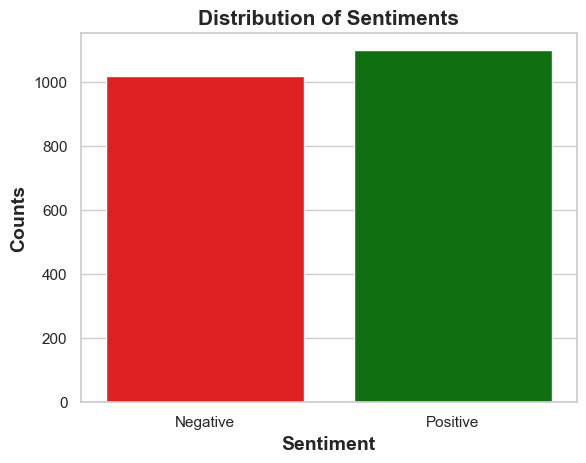

In [165]:
sns.set(style="whitegrid", color_codes=True)
ax = sns.countplot(data=data, x='Liked',  hue='Liked', palette=['red', 'green'], legend=False)
ax.set_xticks(range(len(['Negative', 'Positive'])))
# Set custom labels for the x-axis ticks
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)
plt.title("Distribution of Sentiments", size=15, weight="bold")
plt.xlabel("Sentiment", size=14, weight="bold")
plt.ylabel("Counts", size=14, weight="bold")
# Show the plot
plt.show()

#### Check for null values

In [166]:
# Check for null values
print(data.isna().sum())

Review      0
Liked     103
dtype: int64


In [167]:
# Drop the null values
data.dropna(axis=0, inplace=True)

In [168]:
# Load the small or medium spacy English corpus
nlp = spacy.load("en_core_web_md")

In [169]:
# check the first Row Review, to see how the data looks like.
doc = nlp(data.iloc[0]['Review'])

print(f"Token","POS","Lemma")
for token in doc:
    print(token.text, token.pos_, token.lemma_) #, spacy.spacy_explain(token.lemma_)

Token POS Lemma
Wow INTJ wow
... PUNCT ...
Loved VERB love
this DET this
place NOUN place
. PUNCT .


In [170]:
# Check the spacy process pipeline
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x000001AE935D38E0>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x000001AE93582DA0>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x000001AEB521B5A0>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x000001AE9FE47600>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x000001AE935B5E00>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x000001AEA6962DC0>)]


### Remove Emojis (Replace the Emojis with Text Data)

In [171]:
# Convert Emojis to test
import emoji
def convert_emoji_to_text(emoji_text):
    text_with_aliases = emoji.demojize(emoji_text)
    return text_with_aliases

In [172]:
data['Review'] = data['Review'].apply(convert_emoji_to_text)

### Preprocess and Clean the data

In [173]:
# Remove the Non Alphanumeric words
data['Review'] = data['Review'].apply(lambda x: re.sub(r'[\W_]+', ' ',x))

In [174]:
# Make the text into lower case
data['Review'] = data['Review'].str.lower()

In [175]:
# Remove Stop Words
def remove_stop_words(doc):
    return " ".join([token.text for token in nlp(doc) if not token.is_stop])

data['Review'] = data['Review'].apply(remove_stop_words)

In [176]:
# Lemmatize the words to their base/root word
def lemmatize_text(text):
    return " ".join([token.lemma_ for token in nlp(text)])

data['Review'] = data['Review'].apply(lemmatize_text)

### Frequent words Analysis ( See the most common words in the comments)

In [177]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [178]:
text_data = data['Review']

In [179]:
text = " ".join(text_data.values)

In [180]:
wordcloud = WordCloud(background_color='white').generate(text)

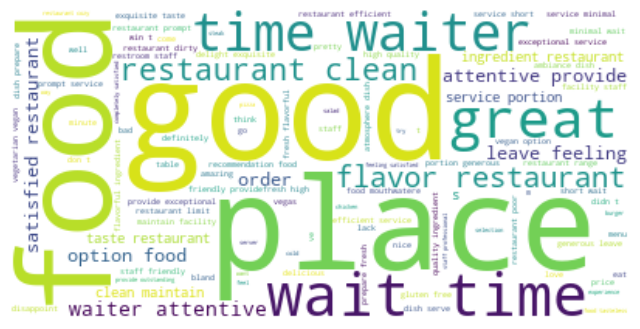

In [181]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Feature Extraction and Vectorization

In [182]:
# Vectorize using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Review']).toarray()
print(X.shape)

(2117, 1806)


In [183]:
# Prepare y(target value)
y = data['Liked']

#### Prepare Training and Test Data

In [184]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Models

In [223]:
# Import Model Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

In [186]:
# Initialize algorithms
logistic_classifier = LogisticRegression()
multinomial_classifier = MultinomialNB()
decision_tree_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
random_forest_classifier = RandomForestClassifier()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Model Algorithms List
algorithms = [logistic_classifier, multinomial_classifier, decision_tree_classifier, 
              svm_classifier, random_forest_classifier, xgb_clf]

LogisticRegression
Accuracy: 0.6132075471698113
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.60      0.46      0.52       194
         1.0       0.62      0.74      0.67       230

    accuracy                           0.61       424
   macro avg       0.61      0.60      0.60       424
weighted avg       0.61      0.61      0.61       424



C:\Users\Simon\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


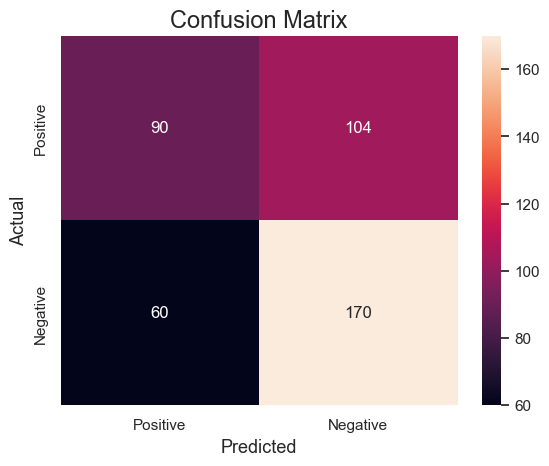

MultinomialNB
Accuracy: 0.5047169811320755
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.47      0.57      0.51       194
         1.0       0.55      0.45      0.50       230

    accuracy                           0.50       424
   macro avg       0.51      0.51      0.50       424
weighted avg       0.51      0.50      0.50       424



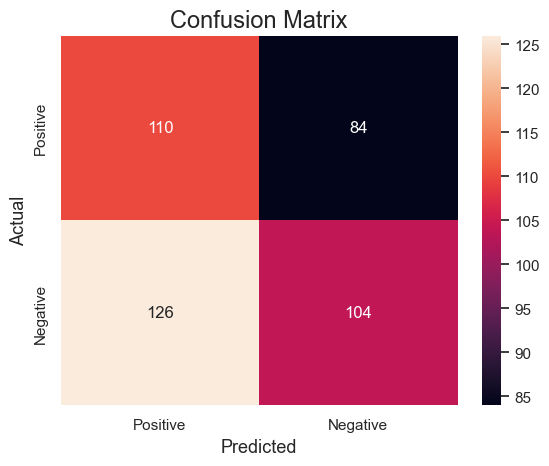

DecisionTreeClassifier
Accuracy: 0.785377358490566
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78       194
         1.0       0.84      0.75      0.79       230

    accuracy                           0.79       424
   macro avg       0.79      0.79      0.79       424
weighted avg       0.79      0.79      0.79       424



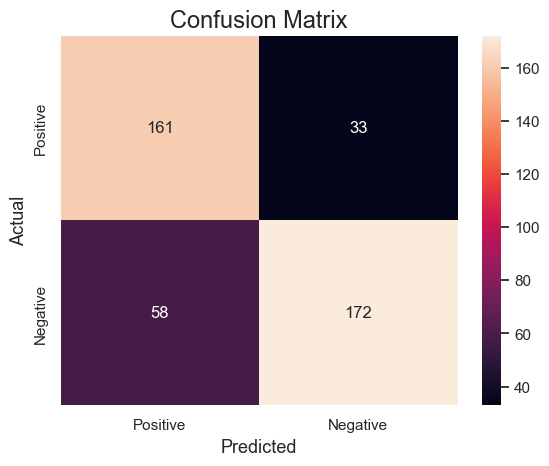

SVC
Accuracy: 0.6037735849056604
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55       194
         1.0       0.63      0.67      0.65       230

    accuracy                           0.60       424
   macro avg       0.60      0.60      0.60       424
weighted avg       0.60      0.60      0.60       424



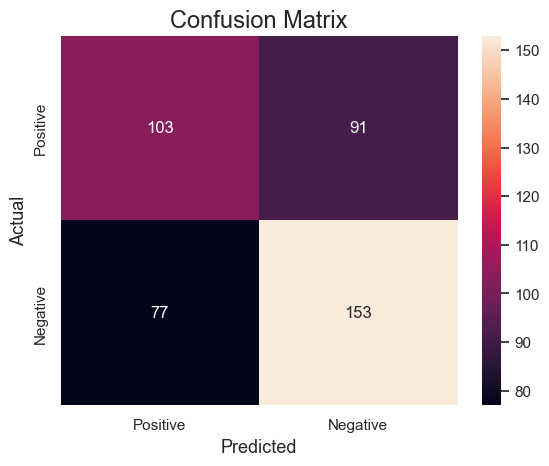

RandomForestClassifier
Accuracy: 0.785377358490566
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78       194
         1.0       0.84      0.75      0.79       230

    accuracy                           0.79       424
   macro avg       0.79      0.79      0.79       424
weighted avg       0.79      0.79      0.79       424



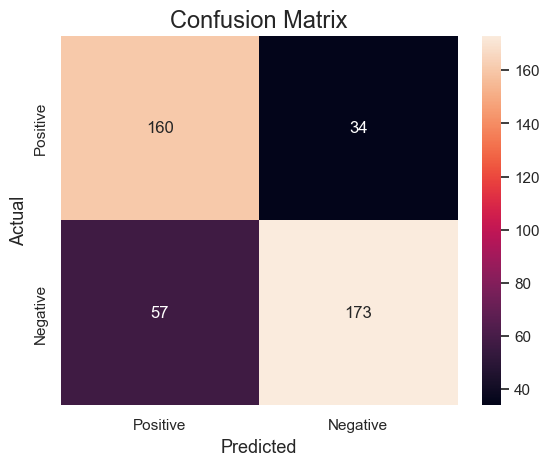

XGBClassifier
Accuracy: 0.8207547169811321
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81       194
         1.0       0.84      0.83      0.83       230

    accuracy                           0.82       424
   macro avg       0.82      0.82      0.82       424
weighted avg       0.82      0.82      0.82       424



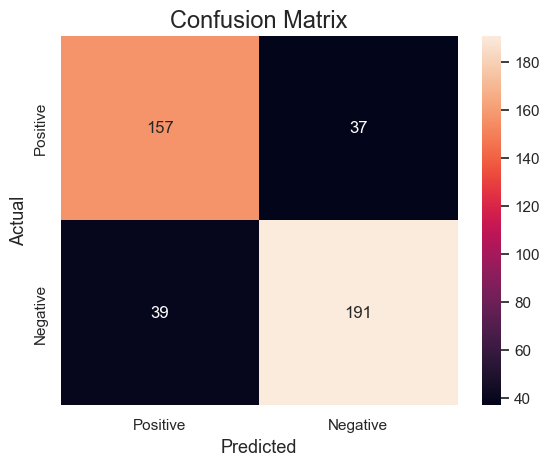

In [222]:
for algorithm in algorithms:
    print(f"{algorithm.__class__.__name__}")
    # Train the Algorithm
    algorithm.fit(X_train,y_train)
    # Make Prediction
    y_pred = algorithm.predict(X_test)
    # Measure Accuracy
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    # Classification Report
    print("Classification Report: ")
    eval_result = classification_report(y_test, y_pred)
    print(eval_result)
    # Assuming you have 'actual' and 'predicted' labels
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
    plt.xlabel('Predicted', fontsize=13)
    plt.ylabel('Actual', fontsize=13)
    plt.title('Confusion Matrix', fontsize=17)
    plt.show()

    

### Hyper Parameter Tuning

#### Ensemble Learning

In [188]:
from sklearn.ensemble import VotingClassifier

In [190]:
# Initialize base classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svm_classifier = SVC(kernel='linear', probability=True)
random_forest_classifier = RandomForestClassifier()

# Create an ensemble using majority voting
ensemble_classifier = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('lr', lr_classifier),
    ('svm', svm_classifier),
    ('rfc',random_forest_classifier)
], voting='soft')  # Use 'soft' voting for probability-based predictions

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('lr', LogisticRegression(max_iter=1000)),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('rfc', RandomForestClassifier())],
                 voting='soft')

In [192]:
# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy: 0.8892
Classification Report:                precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       194
         1.0       0.96      0.83      0.89       230

    accuracy                           0.89       424
   macro avg       0.89      0.89      0.89       424
weighted avg       0.90      0.89      0.89       424



### Deep Learning based Sentiment Analysis

In [194]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import one_hot, Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM

In [195]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [205]:
print(data['Review'])

0                                          wow love place
1                                              crust good
2                                     tasty texture nasty
3       stop late bank holiday rick steve recommendati...
4                              selection menu great price
                              ...                        
2118                portion meager leave feel unsatisfied
2119            restaurant dirty restroom unpleasant odor
2120                          waiter slow forgetful order
2121                         food poorly cook tasted burn
2122                 restaurant cold unwelcoming ambiance
Name: Review, Length: 2117, dtype: object


In [207]:
X = []
sentences = list(data['Review'])
for sen in sentences:
    X.append(sen)

In [208]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X, y, test_size=0.20, random_state=42)

In [232]:
y_test_k

409     0.0
1112    0.0
260     1.0
355     1.0
388     0.0
       ... 
1787    1.0
1365    1.0
638     0.0
59      0.0
412     0.0
Name: Liked, Length: 424, dtype: float64

In [209]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train_k)
X_train_k = word_tokenizer.texts_to_sequences(X_train_k)
X_test_k = word_tokenizer.texts_to_sequences(X_test_k)

# Adding 1 to store dimensions for words for which no pretrained word embeddings exist
vocab_length = len(word_tokenizer.word_index) + 1

# Padding all reviews to fixed length 100
maxlen = 100
X_train_k = pad_sequences(X_train_k, padding='post', maxlen=maxlen)
X_test_k = pad_sequences(X_test_k, padding='post', maxlen=maxlen)

In [210]:
# Load GloVe word embeddings and create an Embeddings Dictionary
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open('C:\\datasets\\glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Print Embedding Matrix shape
embedding_matrix.shape

(1632, 100)

In [216]:
from keras.layers import LSTM

# Neural Network architecture
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128, return_sequences=True))  # First hidden LSTM layer
lstm_model.add(LSTM(64, return_sequences=True))   # Second hidden LSTM layer
lstm_model.add(Dense(1, activation='sigmoid'))

# Explicitly build the model
lstm_model.build(input_shape=(128, maxlen))

# Model compiling
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(lstm_model.summary())

# Model Training
lstm_model_history = lstm_model.fit(X_train_k, y_train_k, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          163200    
                                                                 
 lstm_17 (LSTM)              (None, 100, 128)          117248    
                                                                 
 lstm_18 (LSTM)              (None, 100, 64)           49408     
                                                                 
 dense_9 (Dense)             (None, 100, 1)            65        
                                                                 
Total params: 329,921
Trainable params: 166,721
Non-trainable params: 163,200
_________________________________________________________________
None
Epoch 1/20
11/11 [==============================] - 11s 354ms/step - loss: 0.6850 - accuracy: 0.5195 - val_loss: 0.6214 - val_accuracy: 0.6349
Epoch 2/20
11/11 [=======

14/14 [==============================] - 1s 47ms/step - loss: 0.3263 - accuracy: 0.8762
Test Score: 0.3263467848300934
Test Accuracy: 0.8762498497962952


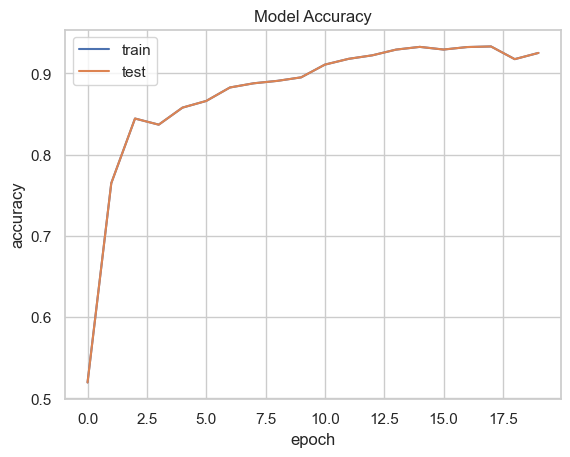

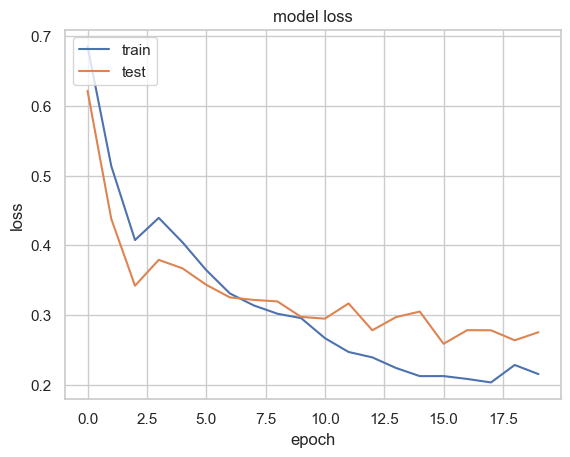

In [218]:
# Predictions on the Test Set
score = lstm_model.evaluate(X_test_k, y_test_k, verbose=1)

# Model Performance
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

# Model Performance Charts
import matplotlib.pyplot as plt
plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [214]:
import numpy as np
new_reviews = ["The food was amazing!", "Service was terrible."]
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = word_tokenizer.texts_to_sequences(new_reviews)

# Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=maxlen)

# Passing tokenised instance to the LSTM model for predictions
unseen_sentiments = lstm_model.predict(unseen_padded)
# Make predictions
predictions = np.argmax(unseen_sentiments, axis=1)
for review, prediction in zip(new_reviews, predictions):
    print(f"Review: {review}\nSentiment: {'Positive' if prediction > 0.5 else 'Negative'}\n")

1/1 [==============================] - 1s 1s/step
Review: The food was amazing!
Sentiment: Positive

Review: Service was terrible.
Sentiment: Negative



In [220]:
# Save Model
lstm_model.save('restaurant_sentiment_model.h5')

14/14 [==============================] - 1s 45ms/step


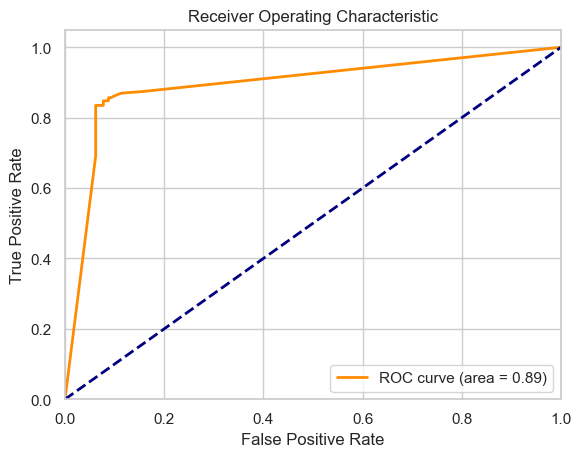

In [234]:
y_pred_k = lstm_model.predict(X_test_k)
y_pred_classes_k = np.argmax(y_pred_k, axis=1)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_k, y_pred_classes_k)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [227]:
from sklearn.metrics import precision_recall_curve, average_precision_score

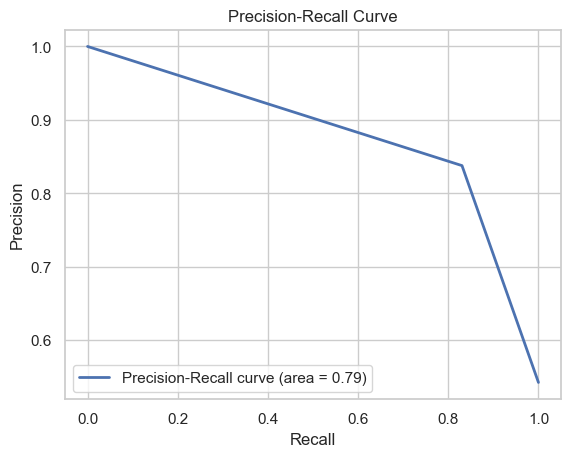

In [229]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate the average precision score
avg_precision = average_precision_score(y_test, y_pred)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()